<a href="https://colab.research.google.com/github/gtanubrata/pahit-ton-PYTHON/blob/master/Feature%20Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gabriella JC-DS-JKT-08

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer, Binarizer
import plotly.figure_factory as ff

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Take Home Exercise 29 April 2020

* Data yang digunakan dalam tugas ini adalah mel_data.csv. Buat dataframeyang berisi kolom Distance, Car, Landsize, Rooms, Bedroom2, Bathroom, dan Price.
* FeaturePriceadalah target sehingga tidak perlu di-scalling. Sedangkan featureDistance, Car, Landsize, Rooms, Bedroom2, Bathroomadalah featureyang harus di-scaling.
* Scaling adalah tahap awal sebelum membuat model machinelearning. Tahap ini dilaksanakan untuk menyamakan skala feature-featurenon-target.
* Hapus Data NaN(meskipun bukan bestpractice) untuk mempermudah latihan!
* Gunakan Scaleryang sesuai dengan kondisi data! Cek ada outliersatau tidakdi feature!
* Simpan ke dalam dataframebaru dengan nama df_ready!

## Step by Step
1. Drop all missing values
2. Check outliers tiap feature
3. Scaling sesuai kondisi feature
4. Simpan dalam df_ready

### Create df and dropna

In [5]:
melb = pd.read_csv('https://raw.githubusercontent.com/mnrclab/Preprocessing_ML_part2/master/melb_data.csv')
melb.head(2)

Suburb          Address  ...             Regionname Propertycount
0  Abbotsford     85 Turner St  ...  Northern Metropolitan        4019.0
1  Abbotsford  25 Bloomburg St  ...  Northern Metropolitan        4019.0

[2 rows x 21 columns]

In [6]:
melb_test = melb[['Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize']].dropna(how='any')
melb_test.isna().sum()

Price       0
Distance    0
Bedroom2    0
Bathroom    0
Car         0
Landsize    0
dtype: int64

### Check for outliers

All features have lots of outliers when visualized with boxplot

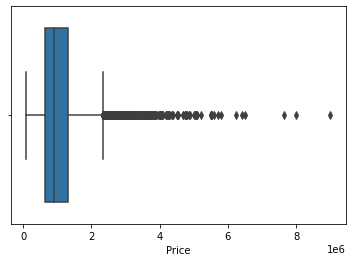

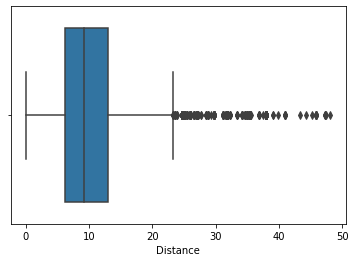

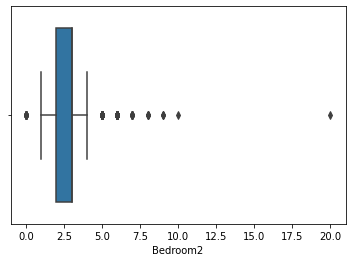

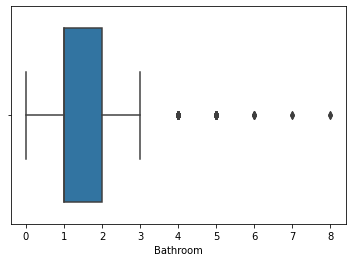

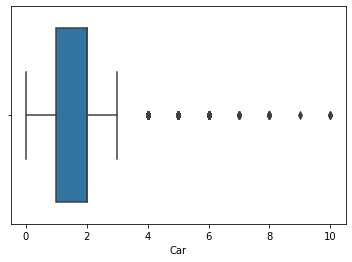

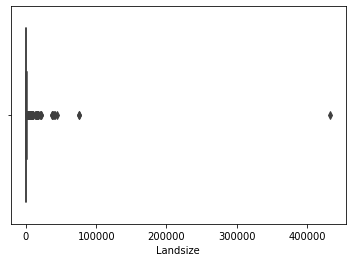

In [7]:
for i in melb_test.columns:
    sns.boxplot(melb_test[i])
    plt.show()

### Scaling

I eliminated MinMax & MaxAbs scaler due to their sensitivity to outliers, leaving Standard & Robust scaler.
I would like preserve the features' original characteristics & my model to be able to process outliers, real data rarely has normal distribution anyway. As long as the n sample is large (>30), according to CLT the distribution of sample mean will be approximately normally distributed.
Standard scaler will change the distribution shape, so I chose to scale all features using RobustScaler.

In [0]:
df_ready = pd.DataFrame(RobustScaler().fit_transform(X = melb_test[['Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize']]), 
                        columns = ['Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize'])
df_ready['Price (target)'] = melb_test['Price']

In [9]:
df_ready.head()

Distance  Bedroom2  Bathroom  Car  Landsize  Price (target)
0 -0.985294      -1.0       0.0 -1.0 -0.508457       1480000.0
1 -0.985294      -1.0       0.0 -2.0 -0.605708       1035000.0
2 -0.985294       0.0       1.0 -2.0 -0.652220       1465000.0
3 -0.985294       0.0       1.0 -1.0 -0.736786        850000.0
4 -0.985294       0.0       0.0  0.0 -0.681818       1600000.0

### Compare the effect of RobustScaler on features with dataviz

In [0]:
def generate_dist(feature):
    hist_data = [melb_test[feature], df_ready[feature]]
    group_labels = ['Original', 'Robust']
    fig = ff.create_distplot(hist_data, group_labels)
    fig.update_layout(title_text='Compare {}'.format(feature))
    return fig

In [11]:
generate_dist('Distance')

In [12]:
melb_test['Distance'].describe()

# quite a rescale from before to after

count    13518.000000
mean        10.157827
std          5.861593
min          0.000000
25%          6.200000
50%          9.200000
75%         13.000000
max         48.100000
Name: Distance, dtype: float64

In [13]:
generate_dist('Bedroom2')

In [14]:
generate_dist('Bathroom')

In [15]:
generate_dist('Car')

In [16]:
generate_dist('Landsize')

In [17]:
melb_test['Landsize'].describe()

# min-max range of original Landsize data is huge

count     13518.000000
mean        558.110593
std        3998.194560
min           0.000000
25%         178.000000
50%         442.500000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64